In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import plot_confusion_matrix

In [21]:
DF=pd.read_csv(r'C:\Users\avira\Desktop\Random Inspirations\bodyfat.csv')
DF.describe()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.601000,44.880000,177.451500,70.355000,37.894000,100.681000,91.867000,22.900000,32.292000,18.221000
std,8.006683,11.417937,29.508013,2.714807,2.302998,8.516493,10.261235,1.346451,3.065141,0.999322
min,3.700000,23.000000,127.500000,65.000000,32.800000,83.400000,70.400000,20.100000,25.600000,16.300000
25%,12.375000,39.750000,152.937500,68.250000,36.275000,94.000000,83.825000,22.000000,29.900000,17.600000
50%,18.950000,44.000000,176.125000,70.000000,37.900000,99.250000,90.150000,22.600000,32.000000,18.200000
75%,24.575000,52.000000,195.437500,72.250000,39.400000,105.600000,98.975000,23.725000,34.400000,18.825000
max,40.100000,74.000000,262.750000,77.750000,43.200000,128.300000,126.200000,27.000000,38.500000,21.400000


In [22]:
DF['IsFat']=[ 1 if i>=20 else 0  for i in DF['Bodyfat']]
DF.drop(columns=['Bodyfat'],inplace=True)

In [23]:
#checking correlation
DF.corr()

,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist,IsFat
Age,1.000000,-0.097905,-0.268673,0.038501,0.072908,0.141339,-0.073522,-0.079398,0.216315,0.181019
Weight,-0.097905,1.000000,0.568433,0.838977,0.916047,0.888317,0.790388,0.786266,0.755123,0.458099
Height,-0.268673,0.568433,1.000000,0.370396,0.345312,0.265403,0.454985,0.435460,0.420928,0.085783
Neck,0.038501,0.838977,0.370396,1.000000,0.789799,0.769086,0.664068,0.701067,0.777259,0.348722
Chest,0.072908,0.916047,0.345312,0.789799,1.000000,0.922728,0.700092,0.730124,0.695795,0.495105
Abdomen,0.141339,0.888317,0.265403,0.769086,0.922728,1.000000,0.643211,0.652148,0.672061,0.612184
Ankle,-0.073522,0.790388,0.454985,0.664068,0.700092,0.643211,1.000000,0.650841,0.688320,0.288644
Biceps,-0.079398,0.786266,0.435460,0.701067,0.730124,0.652148,0.650841,1.000000,0.630473,0.310589
Wrist,0.216315,0.755123,0.420928,0.777259,0.695795,0.672061,0.688320,0.630473,1.000000,0.242070
IsFat,0.181019,0.458099,0.085783,0.348722,0.495105,0.612184,0.288644,0.310589,0.242070,1.000000


In [24]:
X=DF.iloc[:,0:-1]
Y=DF.iloc[:,-1]
Y

0     1
1     1
2     1
3     0
4     1
     ..
95    1
96    1
97    0
98    1
99    0
Name: IsFat, Length: 100, dtype: int64

In [25]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(80, 9) (20, 9) (80,) (20,)


In [26]:
#ApplyDF#Scaling

In [33]:
model=LogisticRegression()
model.fit(Xtrain,Ytrain)
Ypred=model.predict(Xtest)

In [34]:
Ypred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [41]:
np.array(Ytest)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [42]:
DFAnalysis=pd.DataFrame()
DFAnalysis['Ypred']=Ypred
DFAnalysis['Ytest']=np.array(Ytest)#Series to Np array

In [44]:
DFAnalysis

,Ypred,Ytest
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,0
6,1,1
7,0,0
8,0,1
9,0,0


[[ 6  1]
 [ 3 10]]


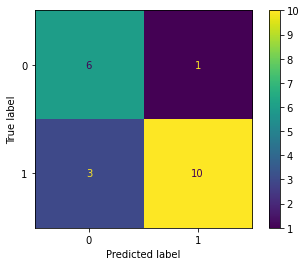

In [46]:
disp=plot_confusion_matrix(model,Xtest,Ytest)
print(disp.confusion_matrix)
